#  Agrupamiento hierarchical clustering

## pasos de la actividad
1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 
4. Entrenar el modelo configurando los diferentes 
hiperparámetros. 
5. Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 
6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo 
7. Interpretar, analizar y documentar los resultados obtenidos. 

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [8]:
# cargar las librerias 

import pandas as pd #5 manejar las estructuras de los datos
import numpy as np #calculo numerico y analisis de datos
import seaborn as  sns # creacion de las graficas.
import matplotlib.pyplot as plt # creacion de graficos en dos dimenciones
import plotly.graph_objs as go # creacion de las graficas en tres dimenciones
import plotly.express as px# creacionde graficos en tres dimenciones


#librerias para implementar el modelo en hierarchical clustering
from sklearn.cluster import AgglomerativeClustering # algoritmos de agrupamiento o clustering, dividir datos en grupos o clusteres basados en su similitud
from sklearn.preprocessing import StandardScaler # escalar o normalizar los datos
from scipy.cluster.hierarchy import  linkage, dendrogram # herramientas para analizar el agrupamiento jerarquico y visualizacion de denogramas

#librerias para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#libreria para evitar la advertencia 
import warnings
warnings.filterwarnings('ignore')

In [10]:
# lectura de los datos

Datos = pd.read_csv ('./Mall_Customers.csv')

df_Mall_Customers_csv = pd.read_csv('./Mall_Customers.csv')

In [12]:
#realizamos la lectura de los datos

Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [69]:
# obtener la informacion dedatos y total de valores de la columna 
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   Cluster                 200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [71]:
Datos.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.00000
mean,38.850000,60.560000,50.200000,1.47500
std,13.969007,26.264721,25.823522,1.36333
min,18.000000,15.000000,1.000000,0.00000
25%,28.750000,41.500000,34.750000,0.00000
50%,36.000000,61.500000,50.000000,1.00000
75%,49.000000,78.000000,73.000000,2.25000
max,70.000000,137.000000,99.000000,4.00000


<Figure size 1000x1000 with 0 Axes>

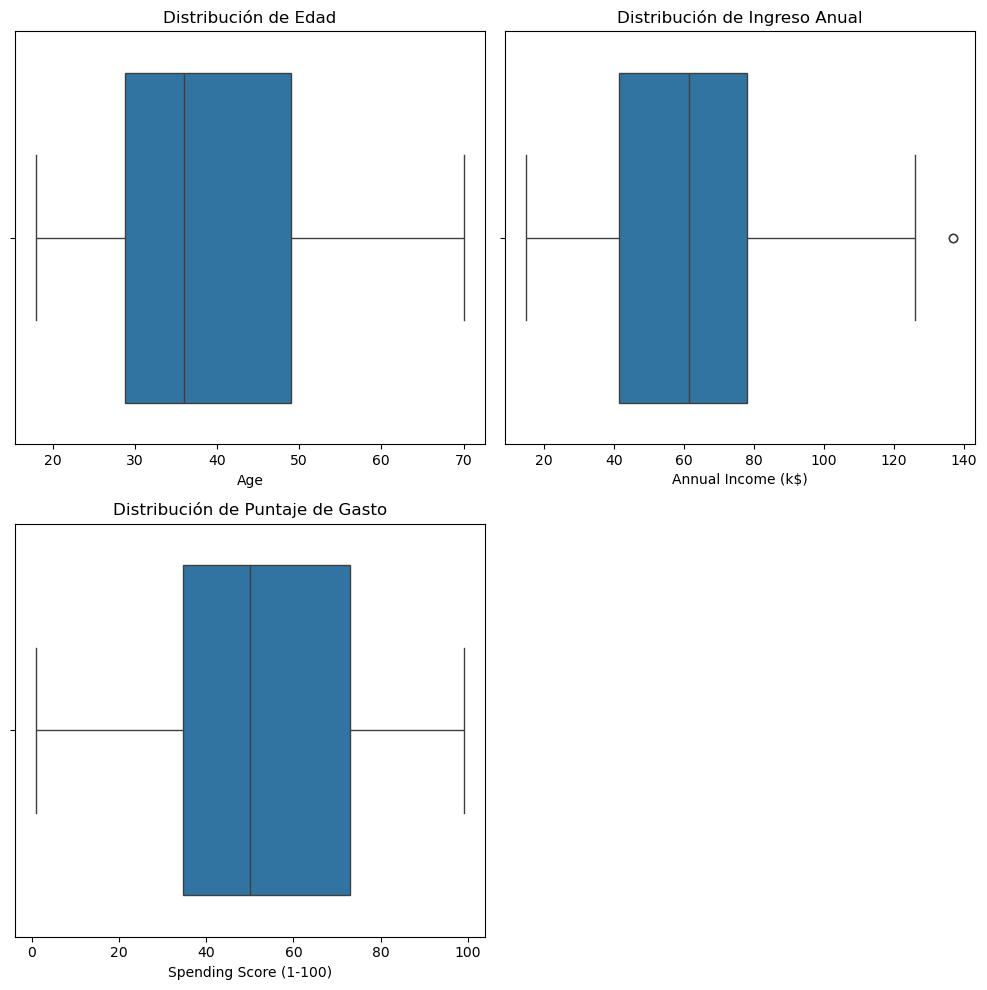

In [25]:
plt.figure(figsize=(10, 10))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=Datos['Age'])
plt.title('Distribución de Edad')

plt.subplot(2, 2, 2)
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Distribución de Ingreso Anual')

plt.subplot(2, 2, 3)
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Distribución de Puntaje de Gasto')

plt.tight_layout()
plt.show()

In [73]:
# Comprobación de valores faltantes
print(Datos.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64


In [77]:
print(Datos.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster'],
      dtype='object')


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [79]:
from sklearn.preprocessing import StandardScaler



# Normalización de los datos (Importante para modelos de clustering)
scaler = StandardScaler()
Datos_scaled = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Verifica la normalización
print(Datos_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
En este caso, como estamos trabajando con tres variables numéricas (Edad, Ingreso y Puntaje de Gasto), no es necesario hacer una selección avanzada de características, pero se podría usar técnicas de selección si fuera necesario.

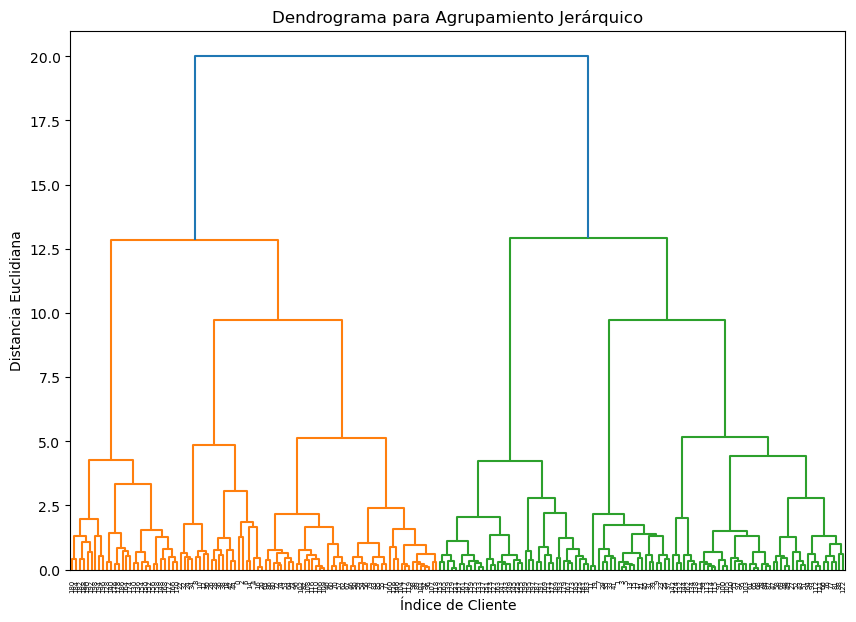

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        4
1    Male   21                  15                      81        0
2  Female   20                  16                       6        4
3  Female   23                  16                      77        0
4  Female   31                  17                      40        4


In [63]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrograma para visualizar la jerarquía de los clústeres
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(Datos_scaled, method='ward'))
plt.title('Dendrograma para Agrupamiento Jerárquico')
plt.xlabel('Índice de Cliente')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Aplicamos el modelo de Agrupamiento Jerárquico sin el argumento affinity
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
Datos['Cluster'] = model.fit_predict(Datos_scaled)

# Verifica que la columna 'Cluster' ha sido creada
print(Datos.head())

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [122]:

# Aplicamos el modelo de Agrupamiento Jerárquico
model = AgglomerativeClustering(n_clusters=6, linkage='ward')  # No es necesario el parámetro affinity
Datos['Cluster'] = model.fit_predict(Datos_scaled)

# Ver los primeros resultados
print(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        4
1   21                  15                      81        5
2   20                  16                       6        4
3   23                  16                      77        5
4   31                  17                      40        4


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [124]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluar el modelo con las métricas
silhouette_avg = silhouette_score(Datos_scaled, Datos['Cluster'])
print(f"Coeficiente de Silhouette: {silhouette_avg}")

calinski_harabasz_avg = calinski_harabasz_score(Datos_scaled, Datos['Cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_avg}")

davies_bouldin_avg = davies_bouldin_score(Datos_scaled, Datos['Cluster'])
print(f"Índice de Davies-Bouldin: {davies_bouldin_avg}")

Coeficiente de Silhouette: 0.4201169558789579
Índice de Calinski-Harabasz: 127.98645433956887
Índice de Davies-Bouldin: 0.8521020845733146


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

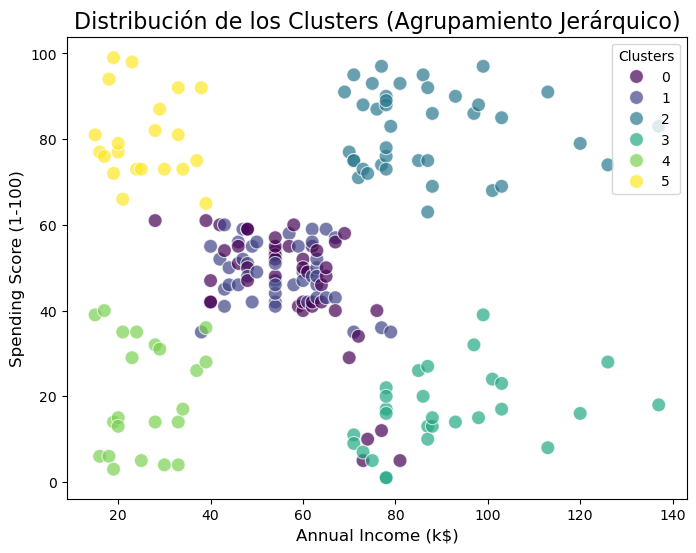

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Datos['Annual Income (k$)'], y=Datos['Spending Score (1-100)'], hue=Datos['Cluster'], palette="viridis", s=100, alpha=0.7)
plt.title("Distribución de los Clusters (Agrupamiento Jerárquico)", fontsize=16)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend(title="Clusters", loc="upper right")
plt.show()

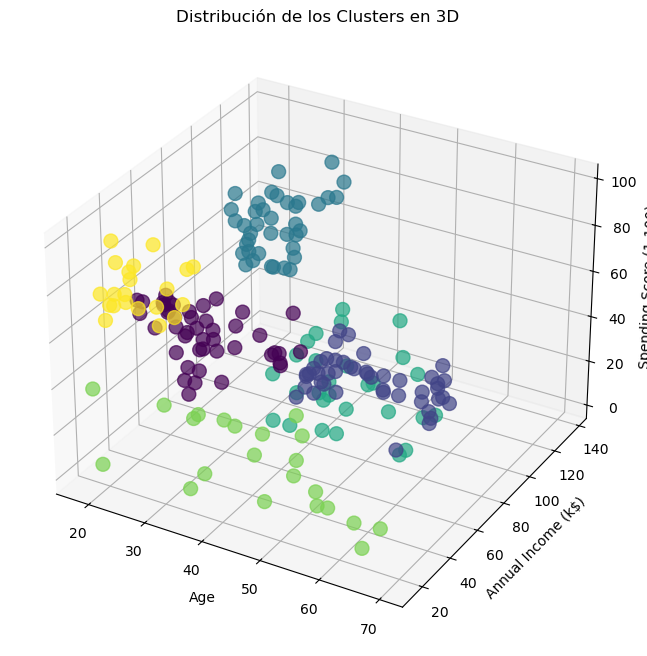

In [128]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Datos['Age'], Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Cluster'], cmap='viridis', s=100, alpha=0.7)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.title('Distribución de los Clusters en 3D')
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos

Coeficiente de Silhouette (0.42):

Un valor de 0.42 para el Coeficiente de Silhouette sugiere que los puntos dentro de los clusters están razonablemente bien agrupados y existe una moderada separación entre los diferentes clusters. Si bien un valor mayor a 0.5 se considera óptimo, un valor de 0.42 sigue siendo aceptable y refleja que los clusters tienen una separación decente, con algunos puntos que podrían estar cerca de los límites entre clusters. Es un indicador de que la segmentación es razonablemente buena, aunque podría mejorarse.

Índice de Calinski-Harabasz (127.99):

El valor de 127.99 es bastante bueno y refleja que los clusters están bien definidos y separados. Este índice mide la cohesión interna de los clusters y la separación entre ellos. Un valor mayor a 100 indica una buena estructura de los clusters, y un valor de 127.99 es un indicativo de que los clusters están bien separados y tienen una cohesión interna adecuada, lo que es un resultado positivo.

Índice de Davies-Bouldin (0.85):

El valor de 0.85 en el Índice de Davies-Bouldin también es bajo, lo que sugiere que los clusters están bien separados y no se solapan excesivamente. Este índice mide la separación entre los clusters, y un valor inferior a 1.0 es generalmente considerado como bueno. El valor de 0.85 indica que los clusters están moderadamente bien separados, lo que es un buen indicativo de la calidad de la segmentación.

Conclusión

El Coeficiente de Silhouette y el Índice de Davies-Bouldin sugieren una buena separación entre los clusters, mientras que el Índice de Calinski-Harabasz indica que los clusters están cohesionados adecuadamente. En general, este modelo parece ser una opción adecuada para segmentar el dataset, y los resultados sugieren que la segmentación obtenida es bastante válida, aunque todavía puede haber margen de mejora en la definición de los clusters.